## Loading Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading the Clean dataset

In [3]:
clean_df = pd.read_csv('clean_resume_data.csv')

In [4]:
clean_df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [5]:
clean_df.shape

(2484, 3)

# EDA

0


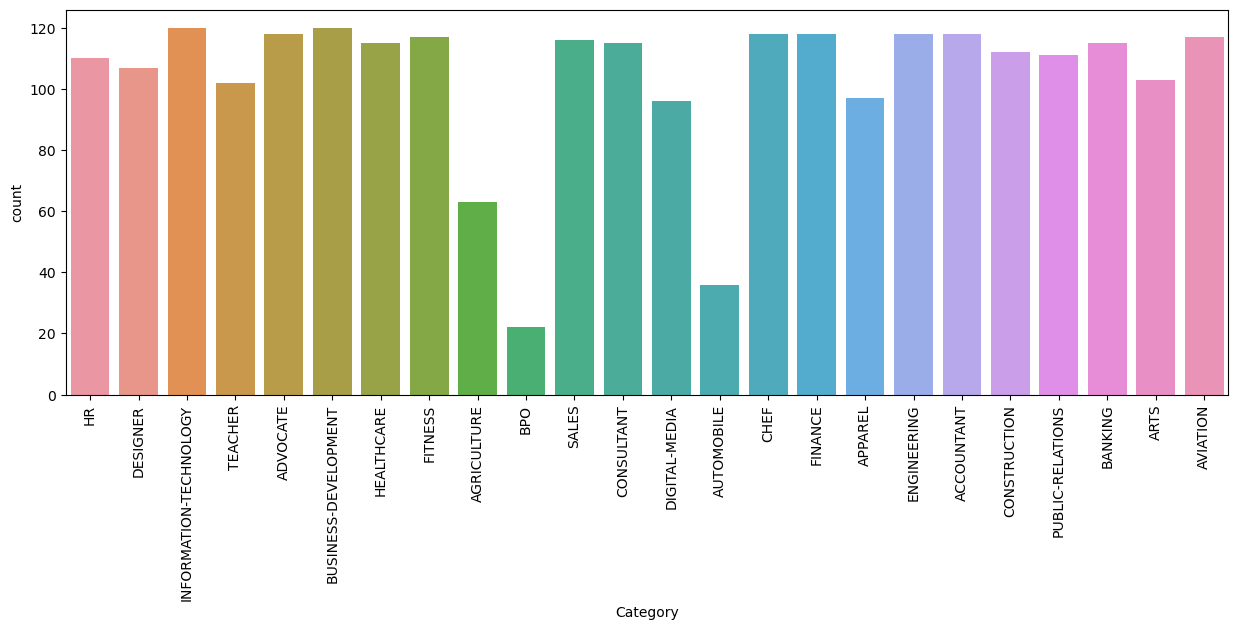

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Category' column is of type 'object'
clean_df['Category'] = clean_df['Category'].astype('object')

# Check for any null values
print(clean_df['Category'].isnull().sum())

# If there are null values, handle them (e.g., drop or fill with a placeholder)
clean_df['Category'].dropna(inplace=True)

plt.figure(figsize=(15, 5))
sns.countplot(x='Category', data=clean_df)
plt.xticks(rotation=90)
plt.show()


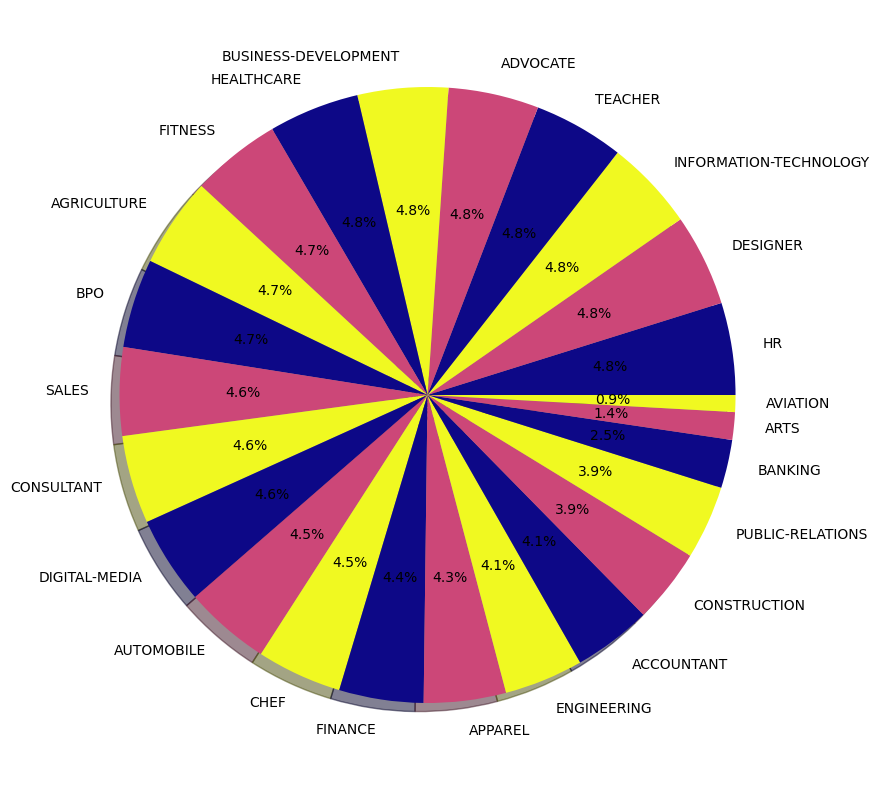

In [9]:
counts = clean_df['Category'].value_counts()
labels = clean_df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

## Balance Dataset

In [16]:
# from sklearn.utils import resample

# Define the maximum count among all categories
max_count = clean_df['Category'].value_counts().max()

# Resample each category to match the maximum count
balanced_data = []
for category in clean_df['Category'].unique():
    category_data = clean_df[clean_df['Category'] == category]
    if len(category_data) < max_count:
        # Perform oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        # Perform undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate the balanced data for all categories
balanced_df = pd.concat(balanced_data)

In [17]:
# balanced_df.isnull().sum()
balanced_df.dropna(inplace=True)

# Train-Test Split

In [53]:
X = balanced_df['Feature']
y = balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding(TF-IDF)

In [54]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train with XG Boost

Accuracy: 0.8923611111111112
                        precision    recall  f1-score   support

            ACCOUNTANT       0.95      1.00      0.98        21
              ADVOCATE       0.96      0.90      0.93        29
           AGRICULTURE       0.90      0.83      0.86        23
               APPAREL       0.94      0.81      0.87        21
                  ARTS       0.80      0.73      0.76        22
            AUTOMOBILE       0.95      1.00      0.97        19
              AVIATION       0.97      0.93      0.95        30
               BANKING       1.00      0.70      0.82        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.82      0.78      0.80        18
                  CHEF       0.97      1.00      0.98        28
          CONSTRUCTION       0.89      1.00      0.94        25
            CONSULTANT       0.75      0.77      0.76        31
              DESIGNER       0.93      0.96      0.95        28
         D

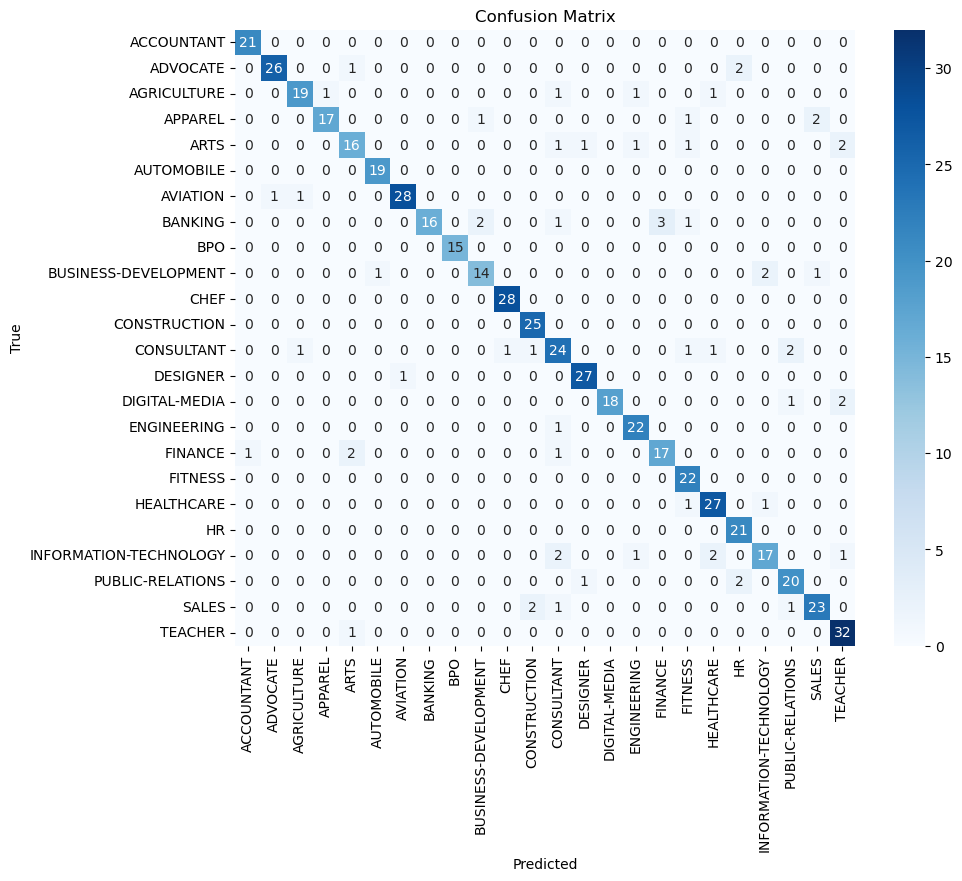

In [45]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Encode the target labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 2: Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Step 3: Train the XGBoost classifier
xgb_classifier.fit(X_train_tfidf, y_train_encoded)

# Step 4: Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test_tfidf)

# Step 5: Decode the numerical predictions back to categorical labels
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

# Step 6: Accuracy Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_decoded)
print("Accuracy:", accuracy_xgb)
print(classification_report(y_test, y_pred_xgb_decoded))

# Step 7: Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb_decoded, labels=label_encoder.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.8663194444444444
                        precision    recall  f1-score   support

            ACCOUNTANT       0.91      0.95      0.93        21
              ADVOCATE       1.00      0.72      0.84        29
           AGRICULTURE       0.95      0.83      0.88        23
               APPAREL       0.95      0.90      0.93        21
                  ARTS       0.88      0.68      0.77        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.94      1.00      0.97        30
               BANKING       1.00      0.83      0.90        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.52      0.67      0.59        18
                  CHEF       0.96      0.96      0.96        28
          CONSTRUCTION       0.89      1.00      0.94        25
            CONSULTANT       1.00      0.65      0.78        31
              DESIGNER       0.96      0.89      0.93        28
         D

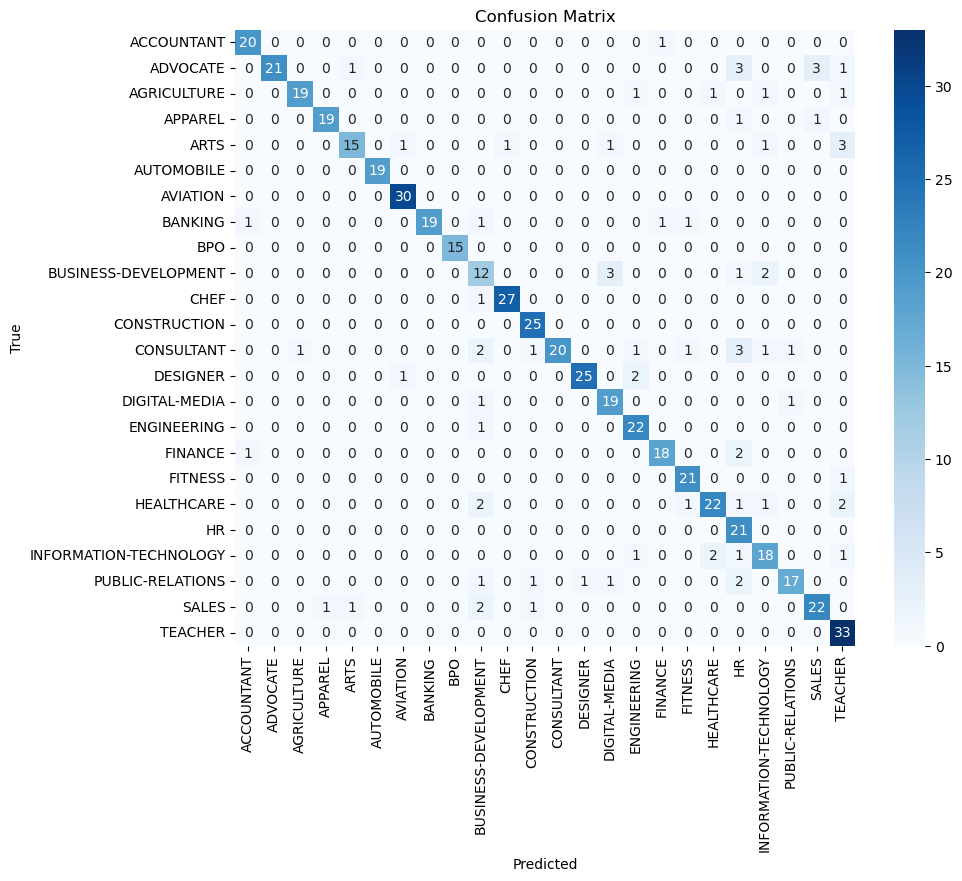

In [55]:
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Step 4: Accuracy Evaluation
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Clean resume
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


# Prediction and Category Name
def predict_category(resume_text):
    resume_text = cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category_num = xgb_classifier.predict(resume_tfidf)[0]
    predicted_category_label = label_encoder.inverse_transform([predicted_category_num])[0]
    return predicted_category_label

In [57]:

resume_file='information technology manager network engineer professional overview highly skilled accomplished information technology manager years expertise planning implementing streamlining systems ensure maximum customer satisfaction business revenue strong leader demonstrated ability work effectively individuals levels functional areas exceptional communication project management skills ability successfully manage multiple priorities assignments skills platforms windows server professional windows xp pro home win dos citrix ica ms exchange hardware hp ibm dell intel based server desktop platforms cisco switches sonic wall hardware vpns hp laser jets toshiba e color copier toshiba sony laptops inter tel software ms office visio citrix metaframe xp symantec pc anywhere ghost antivirus utilities win fax mcafee virus scan adobe acrobat illustrator photoshop partition magic adware spyware networking tcp ip wireless b g dns wins dhcp relevant experience information technology manager network engineer feb current company name city state responsible day day operations functions wilkes six offices staff members currently lead team professionals developers planning upgrades implementation systems business applications development new software tools work closely cio senior management ensure business technology objectives aligned researched new technologies calculated future needs achieve accurate capacity planning negotiated hardware software purchases maintenance contracts dramatically reduced costs maintenance virtualizing company infrastructure using vmware reduced physical servers streamlined disaster recovery processes planned executed active directory domain migration r coordinated planning migration mpls network sites including upgrades routers switches network equipment increased speed reliability company email migrating microsoft exchange streamlined operations designing new citrix infrastructure using netscaler load balancers ensure better speed connectivity less downtime remote offices led planning implementation disaster recovery site atlanta created company first comprehensive business continuity plan tested success installed configuring barracuda spam virus firewalls resulting reduction spam enforced security policies managed monitored updated spam filtering virus malware prevention systems reduced desktop application deployment times designing implementing microsoft system center configuration manager conducted training internal systems local procedures technical subjects company employees coordinate external technology vendors internal staff members third party consultants network engineer sep jan company name city state administered managed windows server network environment responsible lan wan duties local remote networks acted technical consultant clients various projects provide end user support windows xp operating systems installed implemented exchange mail server implemented server desktop security using mcafee enterprise epolicy orchestrator installed configured web servers ftp servers pop mail servers manage cisco switches routers configured vpn remote access users implemented software domain policies patches upgrades using group policy sus trained new employees systems administration web development network support technician jan aug company name city provided network desktop support users provided technical support offices b domain supported help desk using help star software troubleshooting windows desktop computers implemented group policy objects control desktop environment security performed hardware software upgrades replacements performed installations troubleshooting ms office suite managed users computers organizational units active directory created disc images desktop notebook computers using norton ghost troubleshooting repairs laser printers copy machines education bachelor science management information systems university maryland university college city state certifications microsoft certified technology specialist mcts citrix certified administrator cca information systems management certificate project management certificate'

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: INFORMATION-TECHNOLOGY


In [60]:
#Saving the Models

In [62]:
import pickle
pickle.dump(rf_classifier,open('models/rf_classifier_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('models/tfidf_vectorizer_categorization.pkl','wb'))